Linear regression is a statistical method that aims to model the relationship between two variables by fitting a linear equation to the observed data. One variable, known as the predictor or independent variable, is used to predict the value of the other variable, known as the response or dependent variable.

In this case, the linear regression is based on the least squares solution, which is a method of finding the line of best fit that minimizes the sum of the squares of the differences between the observed responses in the dataset and the responses predicted by the linear equation.

The strength of the relationship between the predictor variable (mouse size) and the response variable (mouse weight) is measured by the coefficient of determination, also known as the R-squared value. In this case, the R-squared value is 60%, indicating that mouse size has a strong influence on mouse weight.

The p-value is a statistical measure that is used to assess the strength of the evidence supporting the null hypothesis. In the context of linear regression, the null hypothesis is that there is no relationship between the predictor and response variables. If the p-value is less than a predetermined threshold (usually 0.05), then the null hypothesis is rejected and the relationship between the variables is considered statistically significant. This helps us determine if the fitted line can accurately predict the response variable based on the predictor variable.
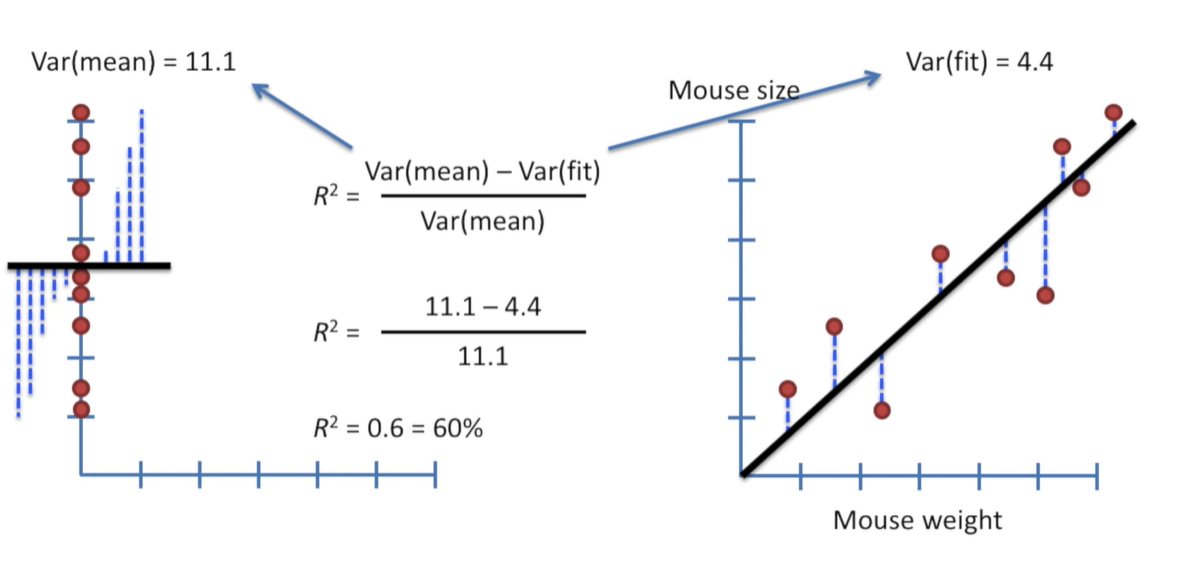

F represents the p value with least squares: 
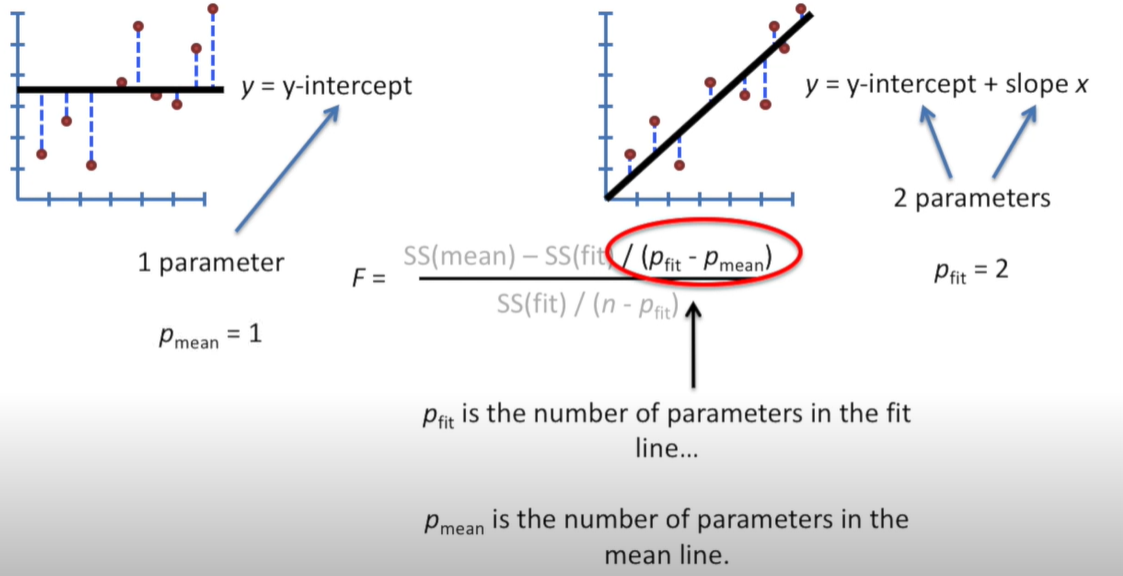


In [2]:
from scipy.stats import linregress

# Define the predictor and response variables
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

# Fit the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the p-value
print(p_value)

4.375000000000076e-80


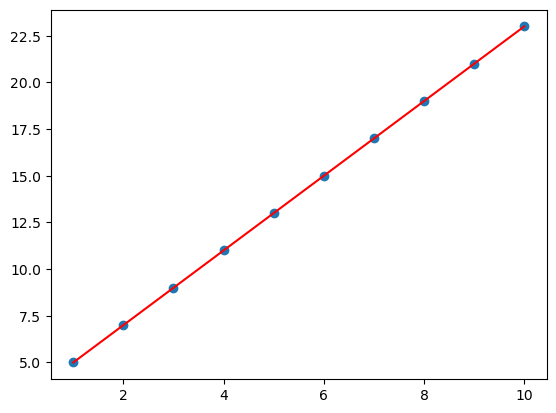

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define the predictor and response variables
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23])

# Fit the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Generate a scatterplot of the data
plt.scatter(x, y)

# Generate a fitted line plot
plt.plot(x, intercept + slope * x, 'r')

# Show the plot
plt.show()

The p-value of 4.375000000000076e-80 is less than 0.05, indicating that there is strong evidence of a relationship between the two variables. Therefore, we can reject the null hypothesis and conclude that there is a significant relationship between the variables.

To understand this solution more closely, we will demonstrate how to find this p-value step by step:

In [24]:
import scipy

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [5.2, 7.3, 9.1, 11.5, 13.9, 15.8, 17.7, 19.5, 21.4, 23.2]

# Calculate the slope
n = 10
sum_x = sum(x)
sum_y = sum(y)
sum_xy = sum(x[i] * y[i] for i in range(len(x)))
sum_x2 = sum(x[i]**2 for i in range(len(x)))
slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

#calculate the intercept
intercept = (sum_y - slope * sum_x) / n

print(slope,intercept)

# Calculate the sum of squares of the errors of the regression line
ss_err = sum((y[i] - (intercept + slope * x[i]))**2 for i in range(len(x)))

# Calculate the sum of squares of the errors of the mean
y_mean = sum(y) / len(y)
ss_mean = sum((y[i] - y_mean)**2 for i in range(len(x)))

# Calculate the R-squared value
r_squared = 1 - (ss_err / ss_mean)

# Calculate the standard error of the slope
std_err = (ss_err / (len(x) - 2))**0.5 / ((ss_mean / (len(x) - 1))**0.5)

# Check if the standard error of the slope is zero
if std_err == 0:
  # If the standard error of the slope is zero, the t-statistic and p-value cannot be calculated or the data fits a perfect line
  t = 0
  p_value = 0
else:
  # Calculate the t-statistic
  t = slope / std_err

  # Calculate the degrees of freedom
  df = len(x) - 2
  # the deegres freedon are determinated by n as the number of sample and the number coeficients (slope and intersection)

  # Calculate the p-value
  p_value = 2 * (1 - scipy.stats.t.cdf(abs(t), df))

# Print the p-value
print(p_value)

2.0193939393939395 3.3533333333333317
7.948308677896421e-11


More info about this proccess https://www.youtube.com/watch?v=PaFPbb66DxQ

Another nice tutorial about the convential formula Y = ax + b
https://www.edureka.co/blog/least-square-regression/

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Reading Data
data = pd.read_csv('./datasets/headbrain.csv')
print(data.shape)
(237, 4)
print(data.head())

(237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [8]:
# Coomputing X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [ ]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)

Slope formula

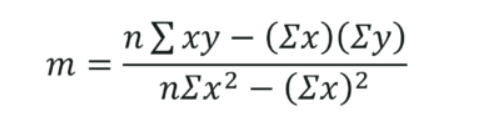

In [11]:
# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
 
# Printing coefficients
print("Coefficients")
print(m, c)

Coefficients
0.26342933948939945 325.57342104944223


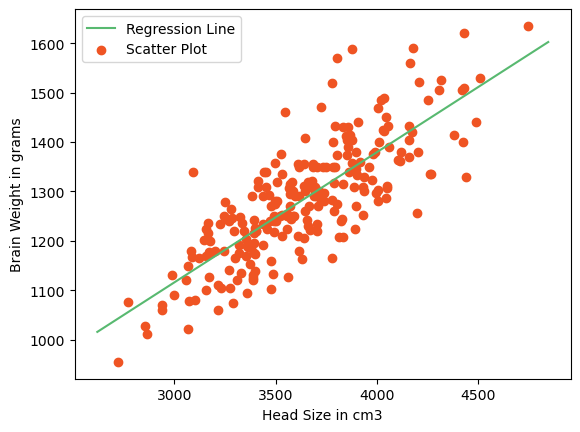

In [13]:
# Plotting Values and Regression Line
 
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

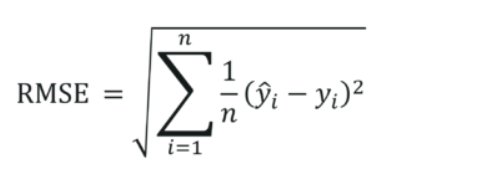

In [14]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

RMSE
72.1206213783709


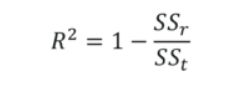

SSt​ is the total sum of squares
SSr​ is the total sum of squares of residuals

In [15]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

R2 Score
0.6393117199570003


Calculating least squares for multiple variables

[ 3.68282145e+02  2.60438766e-01 -2.07316446e+01]


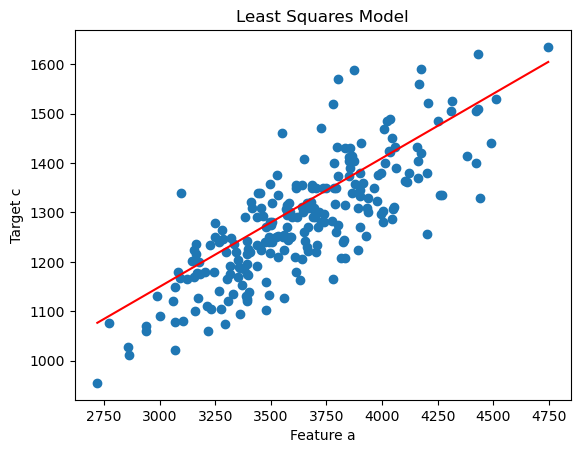

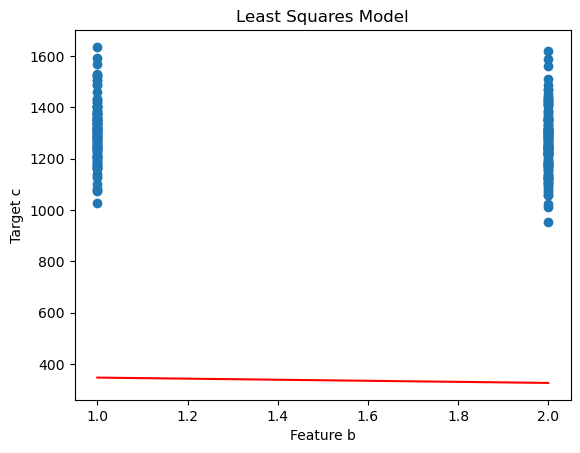

In [68]:
import numpy as np

# Extract the feature columns 'a' and 'b' and the target column 'c' as numpy arrays
X = data[['Head Size(cm^3)', 'Age Range']].values
y = data['Brain Weight(grams)'].values

# Compute the number of samples (m) and the number of features (n)
m, n = X.shape

# Add a column of ones to X for the bias term
X = np.hstack([np.ones((m, 1)), X])

# Initialize the coefficients to 0
beta = np.zeros(n + 1)

# Compute the coefficients using the least squares method
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta)

# Create the scatter plot
plt.scatter(X[:, 1], y)

# Create the line plot
x_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 2)
y_pred = beta[0] + beta[1] * x_range
plt.plot(x_range, y_pred, color='red')

# Add a title and axis labels
plt.title('Least Squares Model')
plt.xlabel('Feature a')
plt.ylabel('Target c')

# Show the plot
plt.show()

# Create the scatter plot
plt.scatter(X[:, 2], y)

# Create the line plot
x_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 2)
y_pred = beta[0] + beta[2] * x_range
plt.plot(x_range, y_pred, color='red')

# Add a title and axis labels
plt.title('Least Squares Model')
plt.xlabel('Feature b')
plt.ylabel('Target c')

# Show the plot
plt.show()

#Note: this feature does not work at all
#pending: https://www.statology.org/linear-regression-p-value/


Unova:
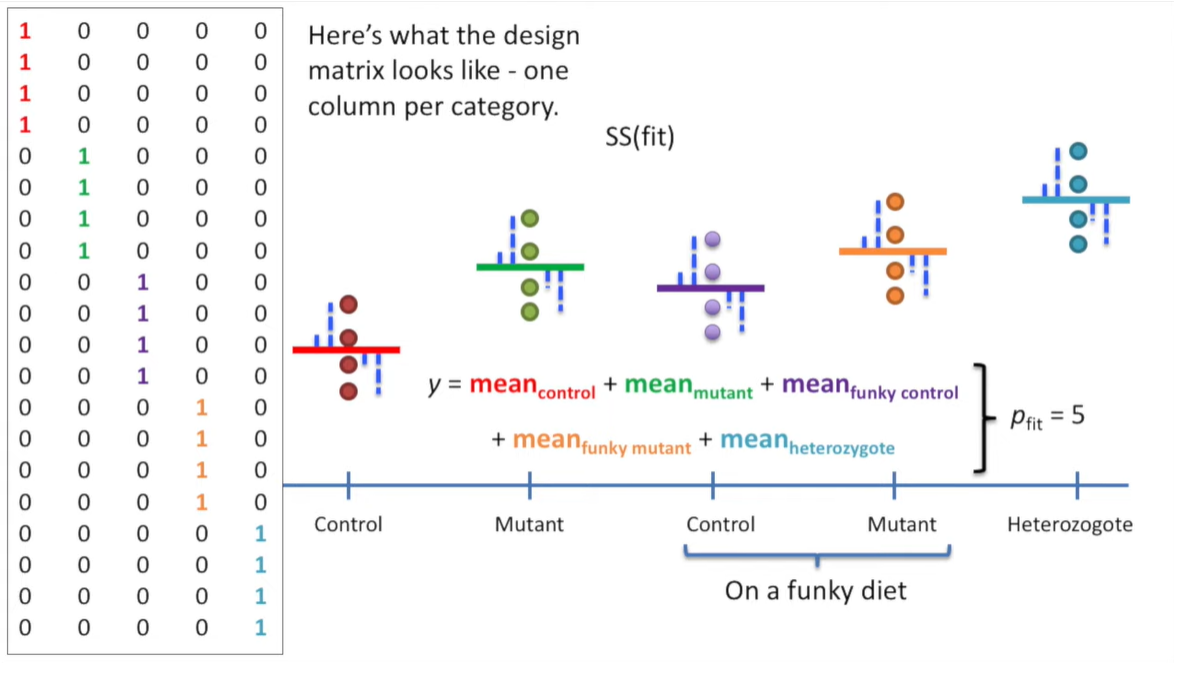

¿What is t-test?
A t-test is a statistical test that is used to determine whether there is a significant difference between the means of two groups. It is commonly used to compare the means of two samples to determine whether they come from the same population.

The t-test is based on the t-statistic, which is calculated as follows:

t = (mean1 - mean2) / (standard error of the difference between the means)

where mean1 and mean2 are the means of the two groups, and the standard error of the difference between the means is a measure of the uncertainty in the difference between the means.

The t-test is used to determine whether the difference between the means is statistically significant. This is done by comparing the t-statistic to a critical value, which is determined by the sample size and the level of confidence desired. If the t-statistic is greater than the critical value, then the difference between the means is statistically significant.

There are several types of t-tests, including the one-sample t-test, the two-sample t-test, and the paired t-test. The type of t-test used depends on the specific research question and the characteristics of the data.

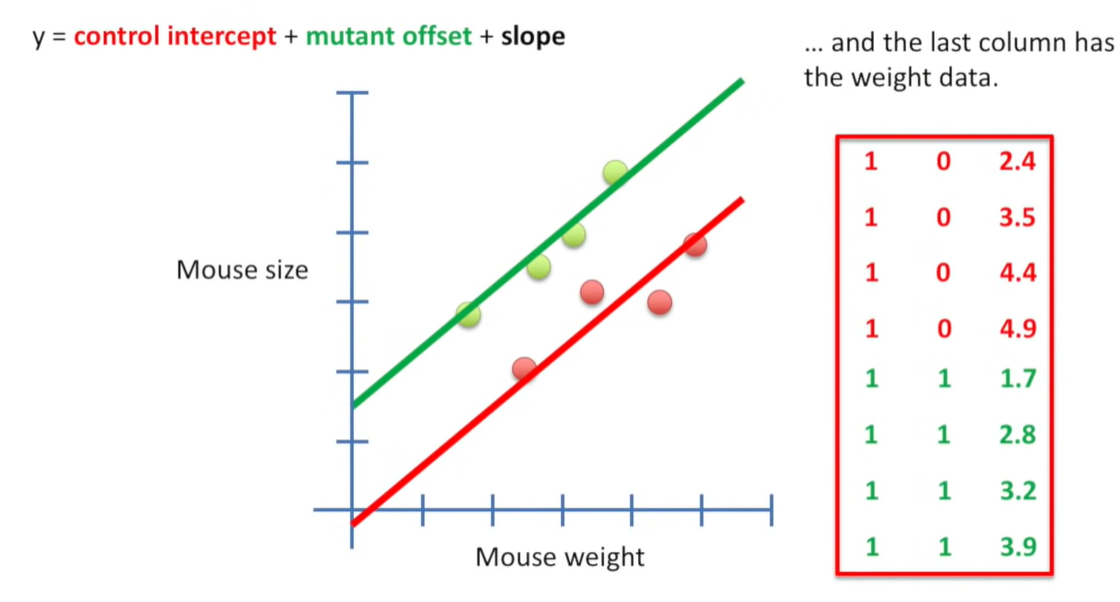

In this case Y = 1 x control_intercept  + 0 x mutant_offset + 2.4 x slope , when the mutant offset is on we get some values, when it is off we get other values.
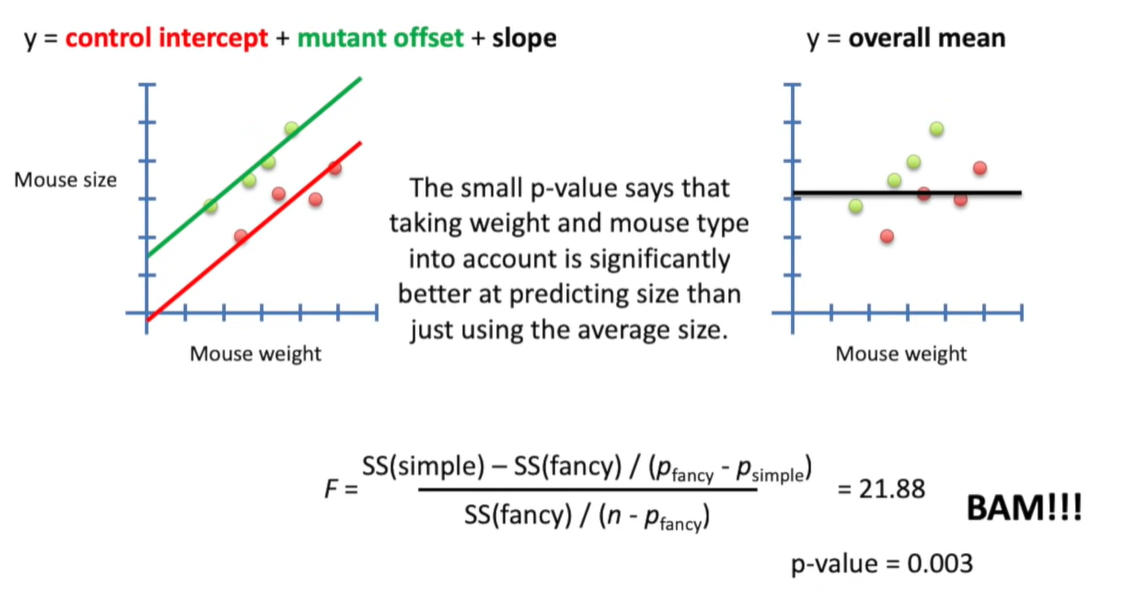